In [23]:
import os
import sys
import numpy as np
import pylab as pl

%pylab inline

from IPython.display import Image

Populating the interactive namespace from numpy and matplotlib


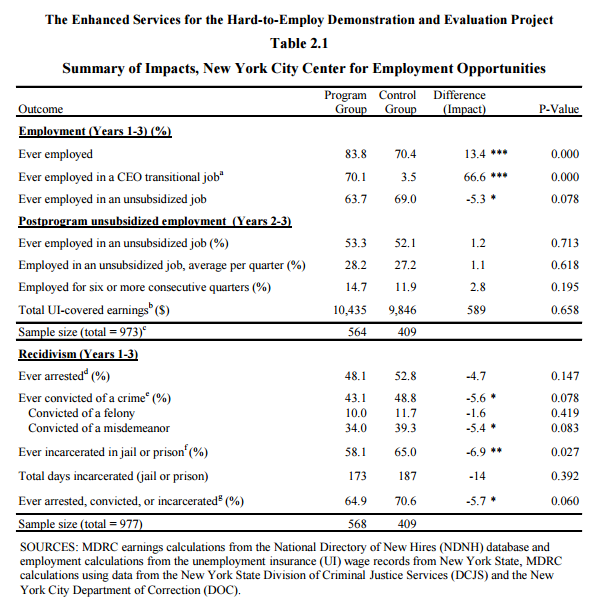

In [24]:
Image(filename='/home/cusp/vys217/PUI2016_vys217/HW4_vys217/Table.PNG')

# NULL HYPOTHESIS: the % of former prisoners employed after release is the same or lower for candidates who participated in the program as for the control group, significance level p=0.05

# $H_0: P_0 - P_1 \geq$    0
    
# $H_a: P_0 - P_1 $< 0    
    
    
# $\alpha$ = 0.05    

# $P_0=0.035, P_1=0.701$

In [65]:
alpha=0.05
# we like fractions better then percentages. as a rule of thumb, either use fractions or counts
P_0 = 3.5 * 0.01 
P_1 = 70.1 * 0.01

if P_0-P_1 >= 0:
    # we are done
    print ("the Null holds")
else:
    print ("We must assess the statistical significance")

n_0 = 409
n_1 = 564

#lets get the counts by multiplying by the sample size
Nt_0 = P_0 * n_0
Nt_1 = P_1 * n_1

We must assess the statistical significance


# 2 samples, categorical data, test options:
## Z test, or Chi-Square test.  

# Z TEST
## The Z test compares the stanrard deviation of the expected distribution and the observed result. it tells you literally how many standard deviations from the tail an observation is, under the _assumption of normality

In [62]:
#define the sample proportion first
sp = (P_0 * n_0 + P_1 * n_1) / (n_1 + n_0)
print (sp)

0.421047276465


# Standard deviation of the sampling distribution the distribution is Binomial, the binomail stdev is 

(see a proof here!: http://stats.stackexchange.com/questions/29641/standard-error-for-the-mean-of-a-sample-of-binomial-random-variables!): 

$\sqrt{\frac{p(1 - p)}{n}}$

for 2 samples this becomes 

$\sqrt{ \frac{ \hat{p}(1 - \hat{p})} {n0} + \frac{ \hat{p}(1 - \hat{p})} {n1} }$

cfr: page 138 of Statistics in a Nutshell, eq. 5.12 and here http://stattrek.com/hypothesis-test/difference-in-proportions.aspx?Tutorial=AP

### $\hat{p} =\frac{p_0  n_0 + p_1  n_1}{n_0+n_1}$


In [63]:
# Function to calculate the standard error
# and to calculate p
p = lambda p0, p1, n0, n1: (p0 * n0 + p1 * n1) / (n0 + n1)
#standard error
se = lambda p, n0, n1: np.sqrt(p * (1 - p) * (1.0 / n0 + 1.0 / n1)) 

# z score: how many standard deviation away from the population parameter is my statistic?

# $z=\frac{P_1-P_0}{\sigma}$

In [66]:
zscore = lambda p0, p1, s : (p0 - p1) / s
z_2y = zscore(P_1, P_0, se(p(P_0, P_1, n_0, n_1), n_0, n_1))
print 'Z-score:', z_2y

Z-score: 20.7697865408


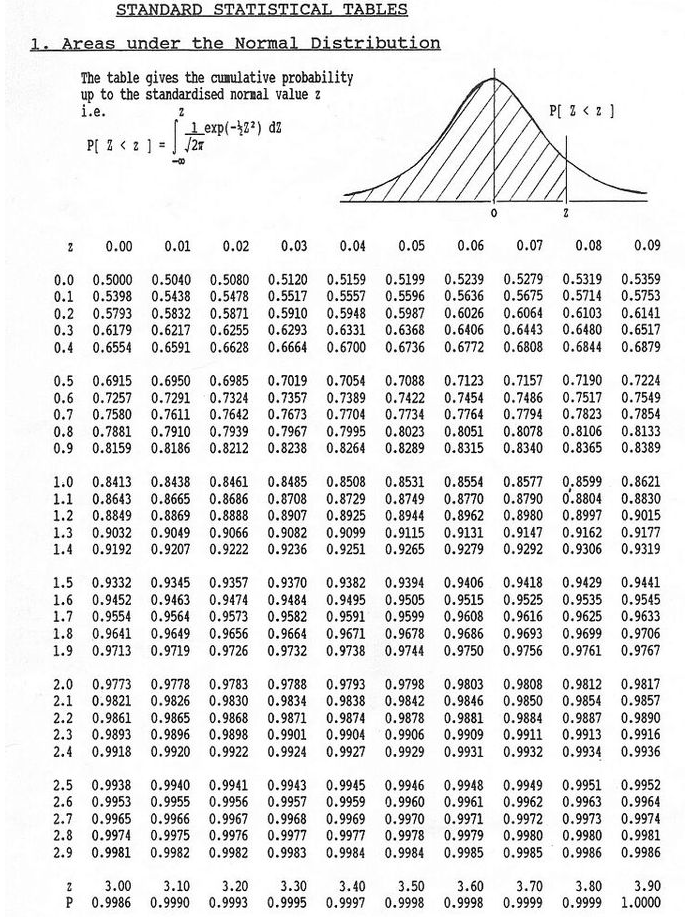

In [52]:
#Z test Table taken from :"https://www.boundless.com/statistics/textbooks/boundless-statistics-textbook/\
#    continuous-random-variables-10/the-normal-curve-39/finding-the-area-under-the-normal-curve-193-2641/"
Image(filename='/home/cusp/vys217/PUI2016_vys217/HW4_vys217/Ztest.PNG')

## if $p<\alpha$ : reject H0

## IMPORTANT!! note that this P in the bottom line of the table is not the p-value, but 
## p-value = 1-P (The probabilities given in the table represent the area to the left of the Z-score. The area to the right of the Z-score = 1 - Area to the left of the Z- score

In [43]:
## p-value for employment after 2 years: 
## since the largest number we read off the table for is (way) smaller 
## than the value for our statistic 
## our p-value will be smaller than it would be if calculated using 
## (e.g.) .9998 (and in fact using 1.0000 which is the largest number 
## in the table). Using 0.9998 is a **conservative** approach. 

p_2y = 1 - 0.9998


def report_result(p,a):
    print ('Is the p value ' + 
           '{0:.2f} smaller than the critical value {1:.2f}?'.format(p,a))
    if p < a:
        print ("YES!")
    else: 
        print ("NO!")
    
    print ('The Null hypothesis is {}'.format(\
                            'rejected' if p < a  else 'not rejected') )

    
report_result(p_2y, alpha)

Is the p value 0.00 smaller than the critical value 0.05?
YES!
The Null hypothesis is rejected


# Used the values for where the former inmate was or was not "Convicted of a felony" (row 10) in the Recidivism (Years 1-3)?


## Null hypothesis = The  proportion of candidates who went through the program and were convicted of a felony in years (1 -3)(Recidivism)  is more than or equal the candidates in the control group, significance level = 0.05

## $H_0 = P_0 - P_1 \leq$ 0 

## $H_a = P_0 - P_1 >$ 0

## $\alpha$ = 0.05 

## $P_0 = 0.117, P_1= 0.10$

In [31]:
alpha=0.05
P_0= 11.7 * 0.01
P_1= 10.0 * 0.01

if P_0-P_1 <= 0:
    # we are done
    print ("the Null holds")
else:
    print ("We must assess the statistical significance")

n_0 = 409
n_1 = 568

#lets get the counts by multiplying by the sample size
Nt_0 = P_0 * n_0
Nt_1 = P_1 * n_1

We must assess the statistical significance


# Z-Test

In [32]:
#define the sample proportion first
sp = (P_0 * n_0 + P_1 * n_1) / (n_1 + n_0)
print 'Sample Proportion:', sp

#calculate the standard error 
se = lambda p, n0, n1: np.sqrt(p * (1 - p) * (1.0 / n0 + 1.0 / n1))
#Calculate sample proportion
p = lambda p0, p1, n0, n1: (p0 * n0 + p1 * n1) / (n0 + n1)
#Calculate Z score
zscore = lambda p0, p1, s : (p0 - p1) / s
z_3y = zscore(P_1, P_0, se(p(P_0, P_1, n_0, n_1), n_0, n_1))

print 'Z Score:', z_3y

Sample Proportion: 0.107116683726
Z Score: -0.84764020522


In [44]:
# For Z Score the table reads : 0.7995
# So the p-value is

p_3y = 1 - 0.7995 

def report_result(p,a):
    print ('Is the p value ' + 
           '{0:.2f} smaller than the critical value {1:.2f}?'.format(p,a))
    if p < a:
        print ("YES!")
    else: 
        print ("NO!")
    
    print ('The Null hypothesis is {}'.format(\
                            'rejected' if p < a  else 'not rejected') )

    
report_result(p_3y, alpha)

Is the p value 0.20 smaller than the critical value 0.05?
NO!
The Null hypothesis is not rejected


# Now lets do it with the $\chi^2$ test

## this analysis can also be done with the $\chi^2$ test, and the  $\chi^2$ distribution, 
## see  [A. Marengo](http://www.csun.edu/~amarenco/Fcs%20682/When%20to%20use%20what%20test.pdf) on how to choose a test and "Statistics In a Nutshell Chapter 4", or http://math.hws.edu/javamath/ryan/ChiSquare.html (if you are really just interested in the formula at face value)

### The chisq statistics tests the statistics calculated as :

$\chi^2 = \sum_{i} \frac{(observation_i - expectation_i)^2}{expectation_i}$

### against a chi sq distribution.
### If we talk about sample fractions  that is 

$\chi^2 = \sum_i \frac{(f_{i,observed} - f_{i,expectated})^2}{f_{i,expected}}$

### Where _i_ indicates the sum over _each cell_.
### turns out this quantity is distributed according to a chi square distribution, so if i get the $\chi^2$ statistics i can compare it to the full chisq distribution and see how far in the tail it is

### The trickiest part (but not that tricky) is to figure out how to construct the table of values. please see Statistics In a Nutshell Chapter 4, for our data for example: Thisis called a CONTINGENCY TABLE

|                 |     success         | failure|    |               
|-----------------|:-------------------:|:-------------------:|---------------------------|
| test sample     | number of successes in test    | number of failures in test    | number members of test sample |
| control sample  | number of successes in control | number of failures in control | number members of control sample| 
|                 | total successes                |  total failures               | number of all members         |

|employed in subsadized job |     employed          | not employed     |                   
|---------------------------|:---------------------:|------------------|---------------------------|
| test sample               | $0.701*564$           | $0.299*564$      | 564                       |
| control sample            | $0.035*409$           | $0.965*4.09$     | 409                       |
|                           |                       |                  |                           |
| total                     | 409.679               |  562.912         | 973                       |

# for each cell the expected ratio is the product of the total of all rows and all columns, devided by the total

# FOR EACH CELL: 
# expected_cell = $\frac{row~tot * col~tot}{total}$

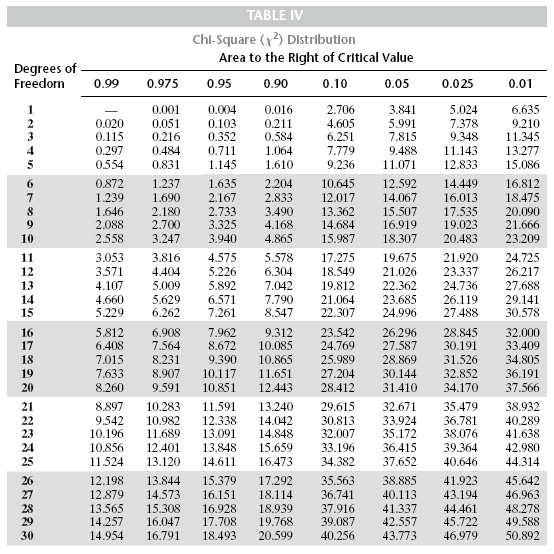

In [70]:
#Chisqure Table taken from : https://faculty.elgin.edu/dkernler/statistics/ch09/9-3.html
Image(filename='/home/cusp/vys217/PUI2016_vys217/HW4_vys217/chisquare.PNG')

In [37]:
def evalChisq(values):
    '''Author: Vishwajeet Shelar
    The function calculates the Chisquare static from the given values of contingency table
    Author: vys217 lifting code from 
    https://github.com/fedhere/PUI2016_fb55/blob/master/HW4_fb55/evalChisq.py
    '''
    values = np.array(values)
    E = np.empty_like(values)
    for j in range(len(values[0])):
        for i in range(2):
            
            E[i][j] = ((values[i,:].sum() * values[:,j].sum()) / 
                        (values).sum())
    return ((values - E)**2 / E).sum()

In [68]:
Ntot = 973 # a + b + c + d = tot

sample_values = np.array([[0.701 * 564, 0.299 * 564], [0.0305 * 409, 0.965 * 409]])
print 'Chi-square Static:', evalChisq(sample_values)

Chi-square Static: 436.223462575


## The degrees of freedom equal (number of columns minus one) x (number of rows minus one) not counting the totals for rows or columns. For our data this gives (2-1) x (2-1) = 1.

### df = 1

## The chi square statistic (x2 = 436.2234), alpha level of significance (0.05), degrees of freedom (df = 1).
## Checking the Chi square distribution table with 1 degree of freedom, value of x2 (436.2234) lies above 6.635
## The corresponding probability is lies below 0.01 probability levels.
## That means that the p-value is less than 0.05. Since p-value < 0.05, the null hypothesis is rejected.

# Used the values for where the former inmate was or was not "Convicted of a felony" (row 10) in the Recidivism (Years 1-3)?¶

## Null hypothesis = The  proportion of candidates who went through the program and were convicted of a felony in years (1 -3)(Recidivism)  is more than or equal the candidates in the control group, significance level = 0.05

## lets see what the chi sq statistics says about the conviction for fellonies (row 10)

## Contingency table

|convicted of a fellony     |     yes   | no        |                   
|---------------------------|-----------|-----------|----------------|
| test sample               |0.10 * 568 |0.90 * 568 |568             |
| control sample            |0.117 * 409|0.883 * 409|409             |
|                           |           |           |                |
| total                     |104.653    |872.347    |977             |

## Using information given on 'http://math.hws.edu/javamath/ryan/ChiSquare.html'

# The degrees of freedom equal (number of columns minus one) x (number of rows minus one) not counting the totals for rows or columns. For our data this gives (2-1) x (2-1) = 1.

### df = 1

In [69]:
total = 977 # a + b + c + d = tot

sample_values = np.array([[0.10 * 568, 0.90 * 568], [0.117 * 409, 0.883 * 409]])
print 'ChiSquare Statistic:', evalChisq(sample_values)

ChiSquare Statistic: 0.718493917505


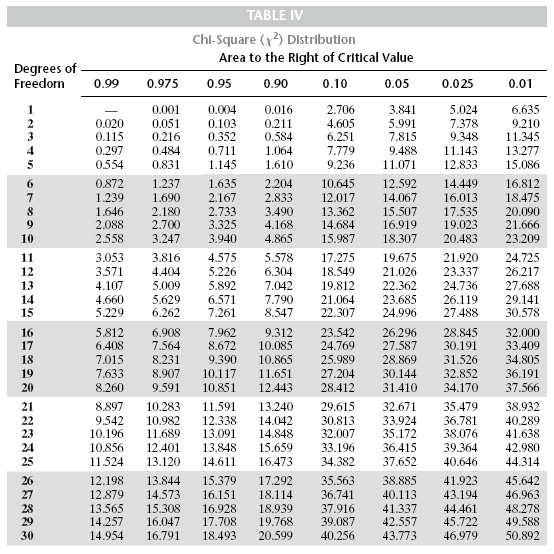

# The chi square statistic (x2 = 0.71849), alpha level of significance (0.05), degrees of freedom (df = 1). 
# Checking the Chi square distribution table with 1 degree of freedom, value of x2 (0.71849) lies between 0.016 and 2.706
# The corresponding probability is between the 0.90 and 0.10 probability levels. 
# That means that the p-value is above 0.05. Since p-value > 0.05, the null hypothesis is not rejected. 
# This is the same result we obtained from Z Test